In [405]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt

from src.utils.assets import labels, labels_binary, labels_multi
from src.utils.read_tif import tif_2_rgb

In [406]:
aggregate_classes = 'multi'
patch_name = 'S2_14-9-18_16PCC'
number = 2

In [407]:
if aggregate_classes == 'binary':
    labels_agg = labels_binary
elif aggregate_classes == 'multi':
    labels_agg = labels_multi
else:
    raise Exception("Wrong type of aggregation of classes")

In [408]:
# Constants
folder_predictions = '/data/anomaly-marine-detection/data/predicted_unet'
folder_gt = '/data/anomaly-marine-detection/data/patches'
model_name = 'unet'
gt_name = "cl"
ext = '.tif'
separator = '_'

original_labels = labels

In [409]:
# Read rgb image
rgb_img = tif_2_rgb(os.path.join(folder_gt, patch_name, patch_name + separator + str(number) + ext))

In [410]:
# Read ground truth
gt = rasterio.open(os.path.join(folder_gt, patch_name, patch_name + separator + str(number) + separator + gt_name + ext))
gt_img = gt.read()

In [411]:
# Read prediction
pred = rasterio.open(os.path.join(folder_predictions, patch_name + separator + str(number) + separator + model_name + ext))
pred_img = pred.read()
pred_img.shape

(1, 256, 256)

Prediction
# pixels = Marine Debris -> 607
# pixels = Algae/Natural Organic Material -> 4
# pixels = Ship -> 193
# pixels = Clouds -> 23863
# pixels = Marine Water -> 40869
Ground truth
# pixels = Mixed Water -> 65476 times
# pixels = Foam -> 60 times


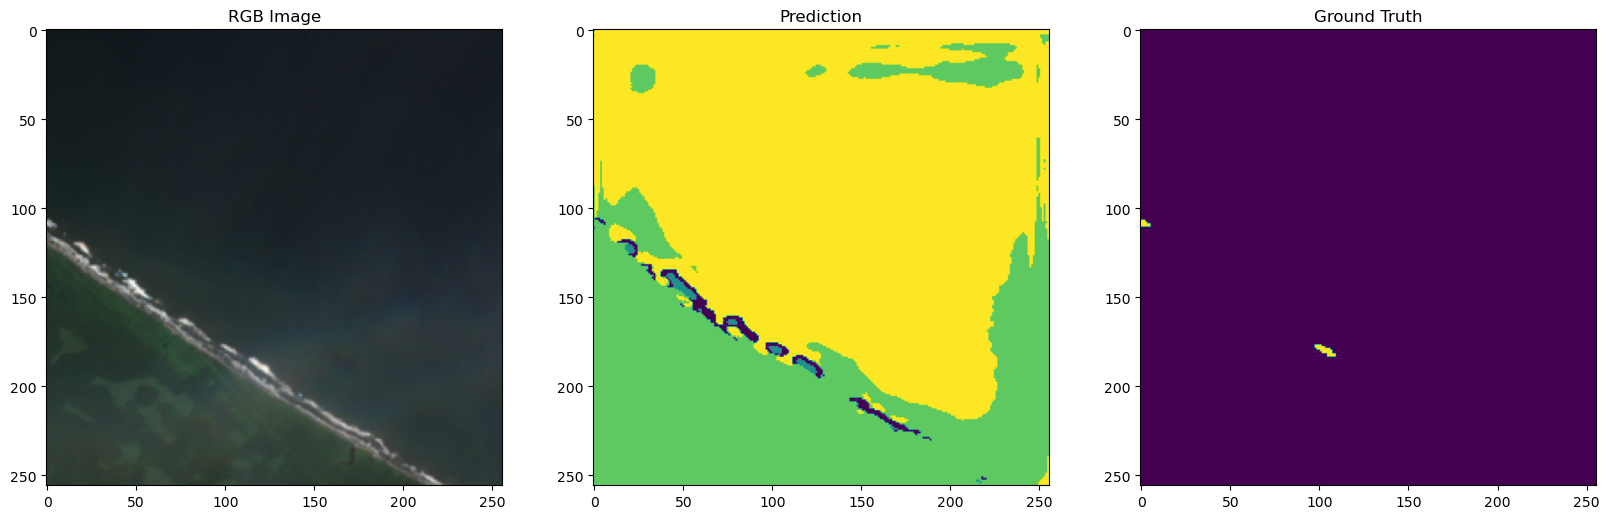

In [412]:
# Plot ground truth and prediction
# The Ground Truth is showing the colors of all the original 15 classes, and not the colors of the aggregated classes (binary or multi)
fig, ax = plt.subplots(1, 3, figsize=(20, 11))
ax[0].set_title("RGB Image")
ax[0].imshow(rgb_img / rgb_img.max())
ax[1].set_title("Prediction")
ax[1].imshow(pred_img[0, :, :])
ax[2].set_title("Ground Truth")
ax[2].imshow(gt_img[0, :, :])
# Print value counts in the prediction
print('Prediction')
values, counts = np.unique(pred_img, return_counts=True)
for idx in range(len(values)):
    print(f"# pixels = {labels_agg[int(values[idx]) - 1]} -> {counts[idx]}")
# Print value counts in the ground truth
print('Ground truth')
values, counts = np.unique(gt_img, return_counts=True)
for idx in range(len(values)):
    print(f"# pixels = {original_labels[int(values[idx]) - 1]} -> {counts[idx]} times")